# 3.1.1 랜덤하게 가중치를 적용해 사인곡선 그리기

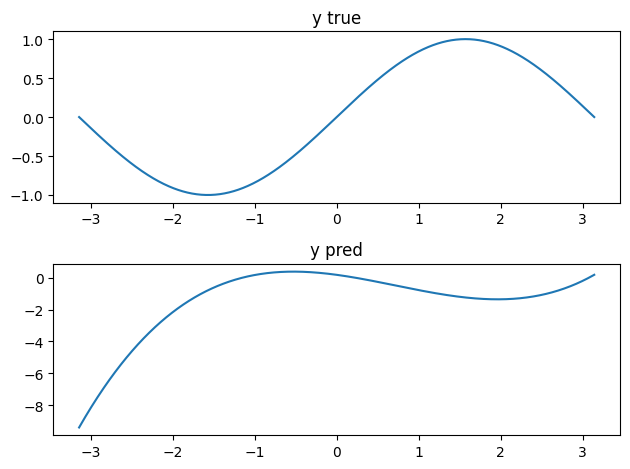

In [7]:
import math # 수학 패키지
import torch # 파이토치 모듈
import matplotlib.pyplot as plt # 시각화 모듈

# -pi부터 pi 사이에서 점 1,000개 추출
x = torch.linspace(-math.pi, math.pi, 1_000)

# 실제 사인 곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

# 예측 사인곡선에 사용할 임의의 가중치(계수) 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x**3 + b * x**2 + c * x + d

# 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2, 1, 2)
plt.title("y pred")
plt.plot(x, y_random)

# 그래프 간격맞춤
plt.tight_layout()

# 실제와 예측 사인곡선 출력하기
plt.show()

# 3.1.2 가중치를 학습시켜서 사인곡선 그리기

epoch1 loss:5719.74853515625
epoch101 loss:1081.723388671875
epoch201 loss:880.2118530273438
epoch301 loss:717.0748901367188
epoch401 loss:584.3419799804688
epoch501 loss:476.34393310546875
epoch601 loss:388.46929931640625
epoch701 loss:316.9667663574219
epoch801 loss:258.78460693359375
epoch901 loss:211.44004821777344
epoch1001 loss:172.91331481933594
epoch1101 loss:141.56134033203125
epoch1201 loss:116.04716491699219
epoch1301 loss:95.28321075439453
epoch1401 loss:78.38455963134766
epoch1501 loss:64.63118743896484
epoch1601 loss:53.43737030029297
epoch1701 loss:44.326480865478516
epoch1801 loss:36.910579681396484
epoch1901 loss:30.87424659729004


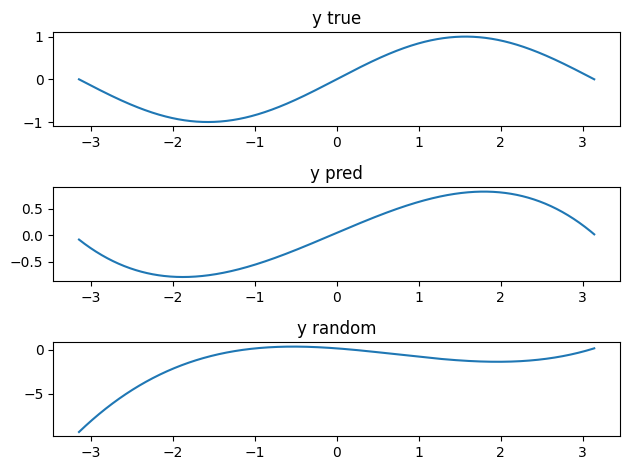

In [9]:
learning_rate = 1e-6 # 학습률 정의

# 학습 2,000번 진행
for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item() # 손실(제곱오차) : 제곱(pow), 합(sum), 실수(item)
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss:{loss}")
    
    grad_y_pred = 2.0 * (y_pred - y) # 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= learning_rate * grad_a # 가중치 업데이트
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

# 3.2 손글씨 분류하기 : 다중분류

## 3.2.1 데이터 살펴보기

In [11]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST

ModuleNotFoundError: No module named 'torchvision'